In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
(Xtrain, Ytrain), (Xtest, Ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain/255
Xtest = Xtest/255
print("before reshaping Xtrain: ",Xtrain.shape)
print("before reshpaing Xtest: ",Xtest.shape)
train_shape = Xtrain.shape
test_shape = Xtest.shape
Xtrain = tf.reshape(Xtrain, (train_shape[0], train_shape[1], train_shape[2], 1))
Xtest = tf.reshape(Xtest, (test_shape[0], test_shape[1], test_shape[2], 1))
print("Xtrain shape: ", Xtrain.shape)
print("Xtest shape: ",Xtest.shape)

before reshaping Xtrain:  (60000, 28, 28)
before reshpaing Xtest:  (10000, 28, 28)
Xtrain shape:  (60000, 28, 28, 1)
Xtest shape:  (10000, 28, 28, 1)


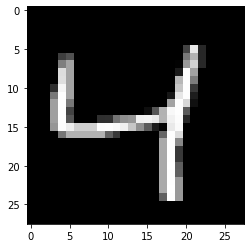

Pixel value  tf.Tensor([0.], shape=(1,), dtype=float64)


In [3]:
plt.imshow(Xtrain[2,:,:], cmap='gray')
plt.show()
print("Pixel value ",Xtrain[2,10,2,:])

In [4]:
img_shape = (train_shape[1],train_shape[2],1)
model = Sequential()
model.add(layers.Conv2D(filters=4,kernel_size=5,padding="valid",activation='relu',input_shape=img_shape))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(layers.Conv2D(filters=12,kernel_size=5,padding="valid",activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=100,activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 12)          1212      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 12)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 100)               1

In [7]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history = model.fit(x=Xtrain, y=Ytrain, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2321 - accuracy: 0.9298
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0802 - accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0382 - accuracy: 0.9880
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0324 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9911
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0232 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [8]:
model.evaluate(Xtest,Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0441 - accuracy: 0.9865


[0.04412754252552986, 0.9865000247955322]

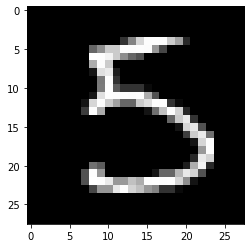

(28, 28, 1)
Predicted number is:  5


In [9]:
test_image_index = 15
plt.imshow(Xtest[test_image_index,:,:], cmap='gray')
plt.show()
print(Xtest[8].shape)
pred = model.predict(tf.reshape(Xtest[test_image_index], (1,28,28,1)))
prediction = pred.argmax()
print("Predicted number is: ",prediction)

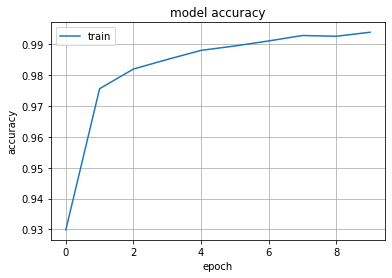

In [10]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.grid()
plt.show()